In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
def generate_time_series(start, end, num_series):
    date_range = pd.date_range(start=start, end=end)
    data = np.random.rand(len(date_range), num_series)
    df = pd.DataFrame(data, index=date_range)
    df.columns = [f'feature_{i}' for i in range(len(df.columns))]
    df.index.name = 'date'
    return df

In [3]:
start_date = datetime(2020, 1, 1)
end_date = datetime(2020, 12, 31)
num_series = 10

In [4]:
df = generate_time_series(start_date, end_date, num_series)

In [5]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
date,,,,,,,,,,
2020-01-01,0.437153,0.471158,0.903058,0.610077,0.360169,0.067267,0.975715,0.382518,0.746848,0.504795
2020-01-02,0.034055,0.973303,0.142370,0.527687,0.439594,0.219067,0.837432,0.375250,0.642587,0.977465
2020-01-03,0.836118,0.448048,0.490813,0.659801,0.673384,0.384969,0.231022,0.602077,0.867880,0.854731
2020-01-04,0.970770,0.456265,0.659520,0.416129,0.623639,0.699021,0.965910,0.442142,0.867747,0.877065
2020-01-05,0.648385,0.112346,0.693674,0.792476,0.640051,0.801146,0.125967,0.785886,0.314226,0.095278


In [6]:
X, y = df.drop(columns=['feature_0']), df['feature_0']
print(f'{X.shape}, {y.shape}')

(366, 9), (366,)


In [7]:
from cpcv_kaggle import CombinatorialPurgedGroupKFold

n_splits = 6
n_test_splits = 2

cpcv = CombinatorialPurgedGroupKFold(
    n_splits=n_splits,
    n_test_splits=n_test_splits,
    pctEmbargo=0.01
)

In [8]:
elements = list(range(len(df)))
groups = [e // n_splits for e in elements]

In [9]:
for i, (train_idx, test_idx) in enumerate(cpcv.split(X, groups=groups)):
    print('-'* 10)
    print(f'Fold {i+1}')
    print(f'Train Idx: {train_idx}')
    print(f'Test Idx: {test_idx}')
    # print(f'(Fold {i}): train rows - ({train_idx[0]}:{train_idx[-1]}); test rows - ({test_idx[0]}:{test_idx[-1]})')

----------
Fold 1
Train Idx: [126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 

In [10]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10, title = None):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["target", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, len(df)],
    )
    if title is None:
        ax.set_title("{} Cross-Validation".format(type(cv).__name__), fontsize=15)

    else:
        ax.set_title(title, fontsize=15)

    return ax

<Axes: title={'center': 'CombinatorialPurgedGroupKFold Cross-Validation'}, xlabel='Sample index', ylabel='CV iteration'>

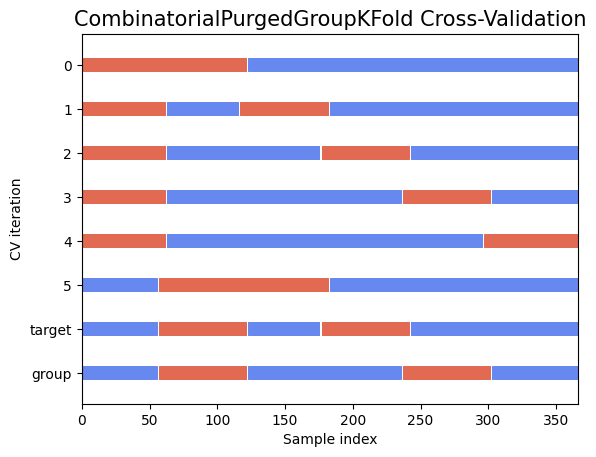

In [11]:
import matplotlib.pyplot as plt
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
fig, ax = plt.subplots()
plot_cv_indices(cpcv, X, y, group=groups, ax=ax, n_splits=n_splits)